In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
import pandas as pd

#import seaborn as sb

import astropy.coordinates as coord
from astropy import units as u

%matplotlib inline

pd.set_option("display.max_rows", None, "display.max_columns", None)
#sb.set(context='talk', style='whitegrid', palette='Set1')
rcParams['axes.prop_cycle'] = cycler(color=['firebrick', 'dodgerblue', 'seagreen', 'darkmagenta', 'burlywood'])
plt.rcParams.update({'font.size' : 18, 'font.family' : 'serif'})

In [11]:
targetspath = os.path.join(os.getcwd(), 'TESStargets.csv')
targets = pd.read_csv(targetspath)

TESStoiPath = os.path.join(os.getcwd(), 'TESS-toi.csv')
TESStoi = pd.read_csv(TESStoiPath)

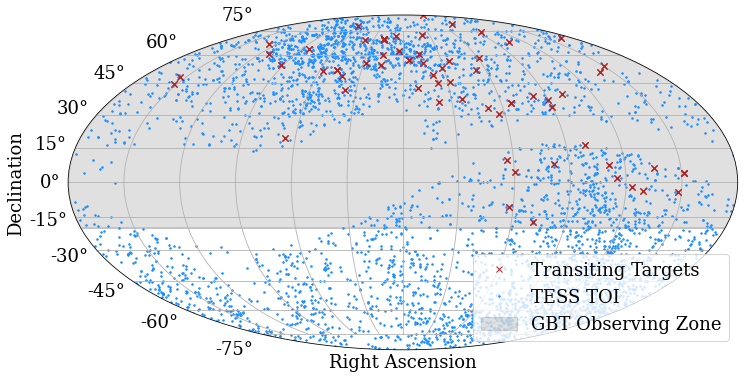

In [12]:
#coords = SkyCoord(targets['ra_hrs'], targets['dec_deg'], unit=(u.hourangle, u.deg))
#TESScoords = SkyCoord(TESStoi['RA'], TESStoi['Dec'], unit=(u.hourangle, u.deg))

a = 0.12
ms = 3

targetRA = coord.Angle(targets['ra_hrs'], unit=u.hourangle)
targetDec = coord.Angle(targets['dec_deg'], unit=u.deg)
tessRA = coord.Angle(TESStoi['RA'], unit=u.hourangle)
tessDec = coord.Angle(TESStoi['Dec'], unit=u.deg)

targetRA = targetRA.wrap_at(180*u.deg)
tessRA = tessRA.wrap_at(180*u.deg)

line1 = np.pi/2
midline = np.linspace(-np.pi, np.pi)
line2 = -20*np.pi/180

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="mollweide")

ax.fill_between(midline, line1, line2, color='k', alpha=a, label='GBT Observing Zone')

ax.plot(targetRA.radian, targetDec.radian, 'x', label='Transiting Targets', zorder=2, markersize=ms*2)
ax.plot(tessRA.radian, tessDec.radian, '.', label='TESS TOI', zorder=1, markersize=ms)


ax.grid()
ax.set_xticklabels([])
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
_=ax.legend(loc='lower right')

66 Full Cadences
1 Partial Cadences


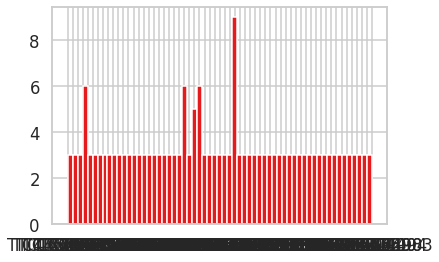

In [4]:
def countCadences(names):
    counts, bins, bars = plt.hist(names, bins=61);

    numCad = 0
    numPartCad = 0
    for count in counts:
        if count%3 == 0:
            numCad += count/3
        else:
            numCad += np.floor(count/3)
            numPartCad += 1

    print(f'{int(numCad)} Full Cadences\n{numPartCad} Partial Cadences')

names = targets['target_name'].to_numpy()
countCadences(names)

In [5]:
fileinfo = pd.read_csv('/home/ubuntu/Documents/BL-TESSsearch/run-turboSETI/prepTurbo/target-file-info.csv')
target_names = fileinfo['TARGET NAME'].to_numpy()
ticTargs = []
for name in target_names:
    if name[:3] == 'TIC':
        ticTargs.append(name)

missTargs = []

ticTargs = np.array(ticTargs)

for name in np.unique(names):
    whereName = np.where(name == ticTargs)[0]
    if len(whereName) == 0:
        missTargs.append(name)

print(f'I originally found {len(np.unique(names))} unique TIC targets')
print(f'There are {len(np.unique(ticTargs))} unique TIC targets in the files list')
print(f'The missing TIC targets are {missTargs}')

I originally found 61 unique TIC targets
There are 55 unique TIC targets in the files list
The missing TIC targets are ['TIC129979528', 'TIC149833117', 'TIC198212955', 'TIC272625214', 'TIC294471966', 'TIC458478250']


In [6]:
# Are any targets in the ETZ
from astropy.coordinates import GeocentricMeanEcliptic, SkyCoord
targetcoord = SkyCoord(targetRA, targetDec)

wetz = 0.520 # width of ETZ centered on ecliptic plane

ecliptic = targetcoord.transform_to(GeocentricMeanEcliptic())

for angle in ecliptic:
    if angle.lat.deg > -wetz/2 and angle.lat.deg < wetz/2:
        print(angle.lat.deg)

In [7]:
i = -1
wheremiss = np.where(targets.target_name.to_numpy() == missTargs[i])[0]

targets.iloc[wheremiss]

,Unnamed: 0,id,session,target_name,utc_observed,receiver,ra_hrs,dec_deg,azimuth,elevation,skyfreq,restfreq,observer,target_id,TIC ID
6,193,46096,AGBT19B_999_114,TIC458478250,2019-11-24 23:54:33,Rcvr2_3,15.476437,66.358710,335.008129,27.311964,2.400000e+09,2.400000e+09,Julia DeMarines,44027.0,458478250
7,194,46098,AGBT19B_999_114,TIC458478250,2019-11-25 00:05:13,Rcvr2_3,15.476441,66.358694,335.710803,26.439039,2.400000e+09,2.400000e+09,Julia DeMarines,44027.0,458478250
8,195,46100,AGBT19B_999_114,TIC458478250,2019-11-25 00:15:51,Rcvr2_3,15.476437,66.358719,336.441727,25.592942,2.400000e+09,2.400000e+09,Julia DeMarines,44027.0,458478250


In [8]:

wheremiss = np.where(targets.target_name.to_numpy() == 'TIC178367144')[0]

targets.iloc[wheremiss]

,Unnamed: 0,id,session,target_name,utc_observed,receiver,ra_hrs,dec_deg,azimuth,elevation,skyfreq,restfreq,observer,target_id,TIC ID
42,778,48388,AGBT19B_999_132,TIC178367144,2020-01-19 08:02:02,Rcvr2_3,8.226144,-1.982782,227.728475,37.890752,2.400000e+09,2.400000e+09,Bryan Brzycki,43835.0,178367144
43,779,48390,AGBT19B_999_132,TIC178367144,2020-01-19 08:12:36,Rcvr2_3,8.226146,-1.982801,230.400003,36.322942,2.400000e+09,2.400000e+09,Bryan Brzycki,43835.0,178367144
44,780,48392,AGBT19B_999_132,TIC178367144,2020-01-19 08:23:14,Rcvr2_3,8.226144,-1.982760,232.974044,34.686821,2.400000e+09,2.400000e+09,Bryan Brzycki,43835.0,178367144
